In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('dl_plus.txt', sep=" ", header=None)
data.columns = ["number", "date", "scores"]

In [3]:
data.head()

,number,date,scores
0,1.0,15.09.2012,"4,5,37,39,43,49"
1,2.0,18.09.2012,"24,36,40,41,43,47"
2,3.0,20.09.2012,"9,15,17,20,23,40"
3,4.0,22.09.2012,"11,13,22,28,32,37"
4,5.0,25.09.2012,"4,9,14,24,44,47"


In [4]:
data['one'], data['two'], data['three'], data['four'], data['five'], data['six'] = data['scores'].str.split(',').str
data.drop('scores', axis=1, inplace=True)

for col in ['one', 'two', 'three', 'four', 'five', 'six']:
    data[col] = data[col].astype(int)

In [5]:
data.drop(['number', 'date'], axis=1, inplace=True)
data.head()

,one,two,three,four,five,six
0,4,5,37,39,43,49
1,24,36,40,41,43,47
2,9,15,17,20,23,40
3,11,13,22,28,32,37
4,4,9,14,24,44,47


In [6]:
sns.set()
def draw_figure(number):
    plt.figure(figsize=(18,12))
    sns.countplot(x=number, data=data)
    plt.title(number, fontsize=24)
    plt.ylabel('occurrences', fontsize=16)
    plt.xlabel('number', fontsize=16)

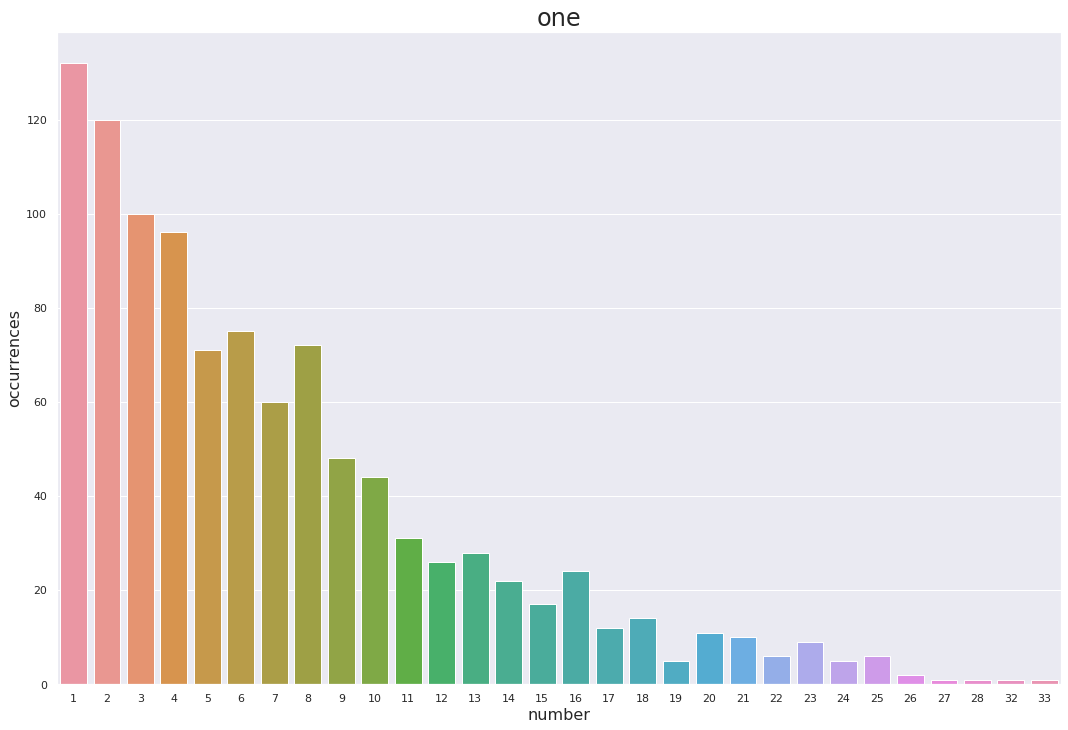

In [7]:
draw_figure('one')

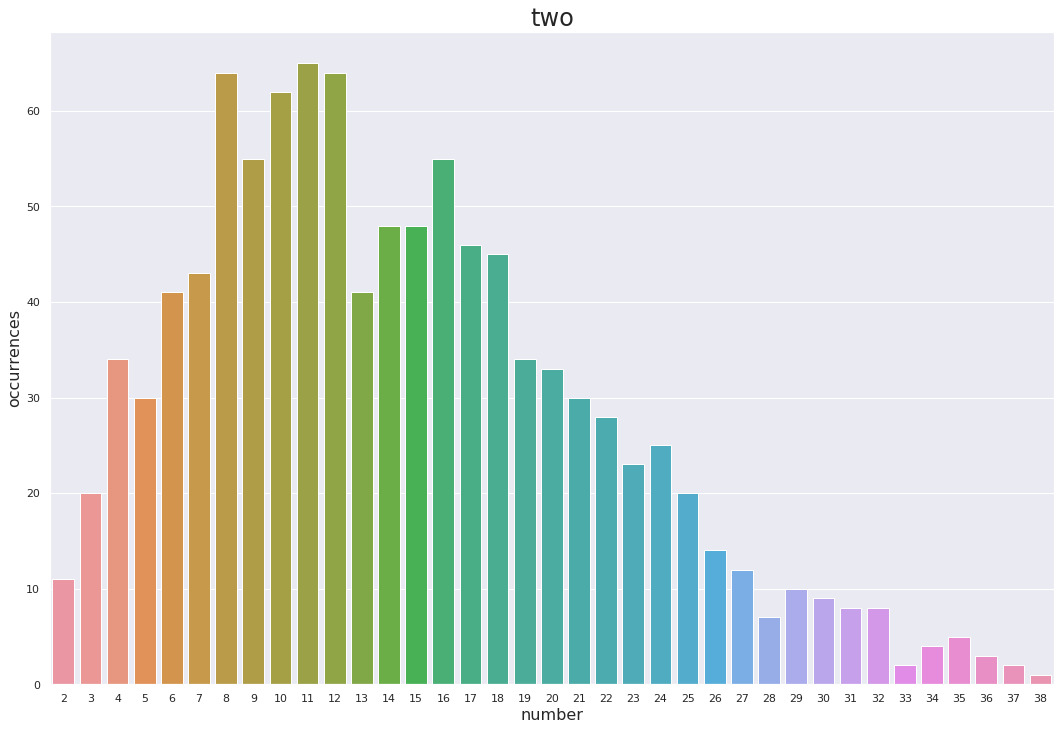

In [8]:
draw_figure('two')

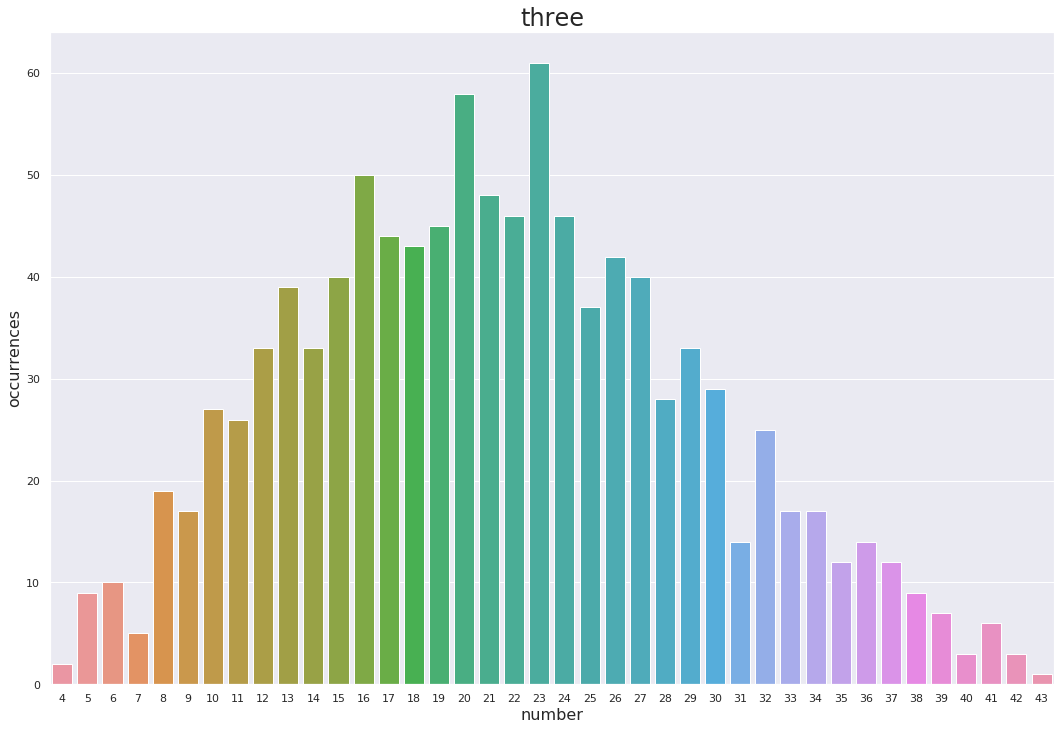

In [9]:
draw_figure('three')

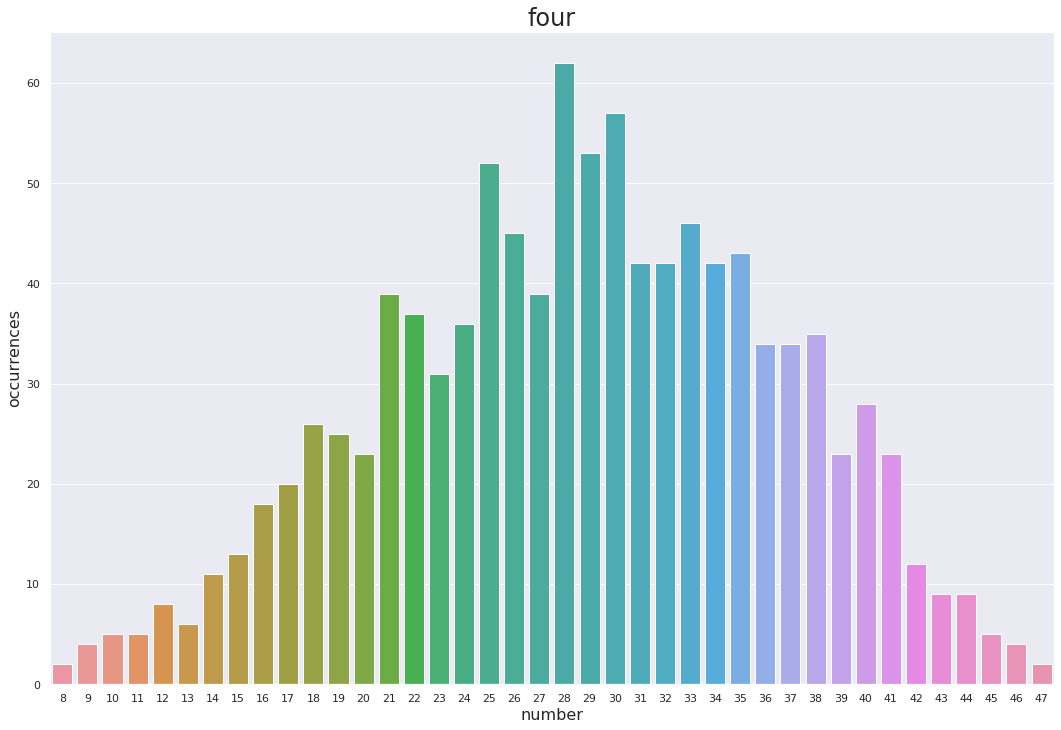

In [10]:
draw_figure('four')

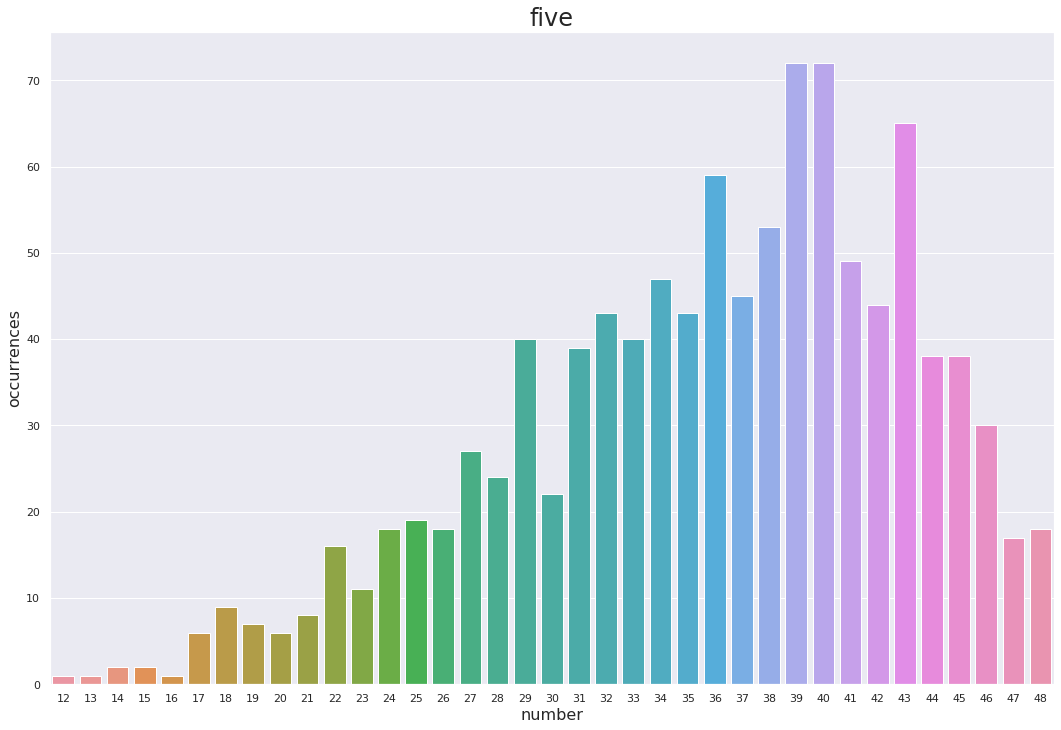

In [11]:
draw_figure('five')

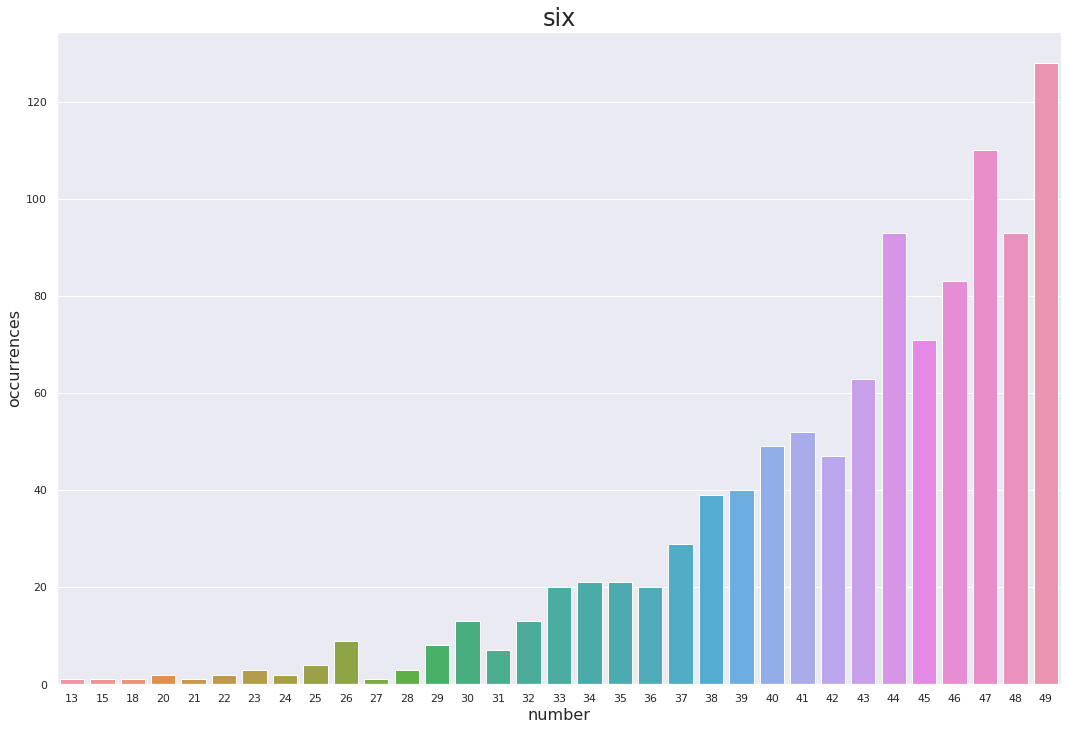

In [12]:
draw_figure('six')

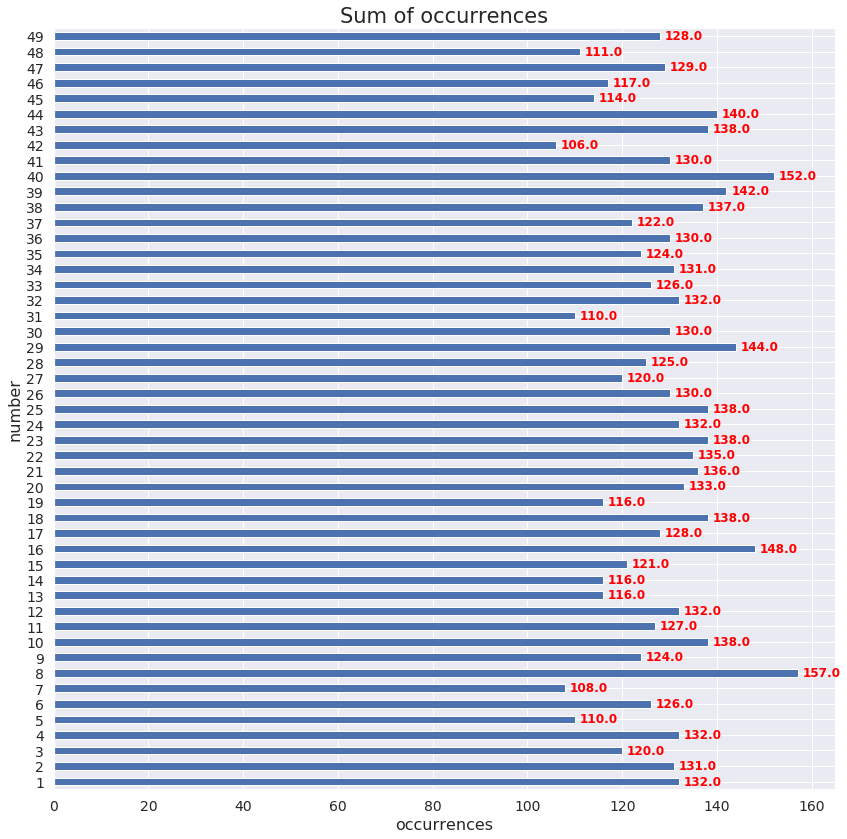

In [13]:
sum_of_occurrences = data['one'].value_counts().add(data['two'].value_counts(), fill_value=0).add(data['three'].value_counts(), fill_value=0).add(data['four'].value_counts(), fill_value=0).add(data['five'].value_counts(), fill_value=0).add(data['six'].value_counts(), fill_value=0)
ax = sum_of_occurrences.plot(kind='barh', figsize=(14,14), title='sum of occurrences', fontsize=14)

ax.set_title('Sum of occurrences',fontsize=21)
ax.set_xlabel('occurrences',fontsize = 16)
ax.set_ylabel('number', fontsize = 16)

for i, v in enumerate(sum_of_occurrences):
    ax.text(v+1, i-0.2, str(v), color='red', fontweight='bold')

In [14]:
sum_of_occurrences.nlargest(6)

8     157.0
40    152.0
16    148.0
29    144.0
39    142.0
44    140.0
dtype: float64

In [15]:
# input : from 1 to 49
# output : 6 most probably numbers

model = tf.keras.Sequential()

In [25]:
model.add(tf.keras.layers.Dense(49, input_shape=(49,1)))

In [26]:
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(6, activation='softmax'))

In [27]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [28]:
model.fit(, sum_of_occurrences, epochs=10)

ValueError: Error when checking input: expected dense_input to have 3 dimensions, but got array with shape (1050, 6)